In [2]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
# Ruta al archivo CSV
archivo_csv = "healthcare-dataset-stroke-data.csv"

In [3]:
# Abre el archivo CSV y lee los datos
with open(archivo_csv, 'r', newline='') as archivo:
    lector_csv = csv.reader(archivo)
    
    # Lee la primera fila para obtener los nombres de las columnas (cabecera)
    cabecera = next(lector_csv)
    
    # Imprime las columnas disponibles para que el usuario las vea
    print("Columnas disponibles:")
    for i, columna in enumerate(cabecera):
        print(f"{i + 1}. {columna}")
    
    # Solicita al usuario que ingrese las columnas de interés separadas por comas
    columnas_seleccionadas = '3,4,5'
    columnas_seleccionadas = [int(idx) - 1 for idx in columnas_seleccionadas.split(",")]
    
    # Crea un diccionario para almacenar datos por columna
    datos_por_columna = {cabecera[i]: [] for i in columnas_seleccionadas}
    
    # Recorre cada fila en el archivo CSV y almacena los valores de las columnas seleccionadas en el diccionario
    for fila in lector_csv:
        for i, valor in enumerate(fila):
            if i in columnas_seleccionadas:
                datos_por_columna[cabecera[i]].append(valor)



Columnas disponibles:
1. id
2. gender
3. age
4. hypertension
5. heart_disease
6. ever_married
7. work_type
8. Residence_type
9. avg_glucose_level
10. bmi
11. smoking_status
12. stroke


In [4]:
# Inicializa listas para las estadísticas
etiquetas = ['Media', 'Moda', '25%', '50%', '75%', '10%', '90%']
valores = []

Columna: age
Media: 43.226614481409015
Moda: 78.0
Cuartiles: [25.0, 45.0, 61.0]
Percentiles: [25.0, 61.0]



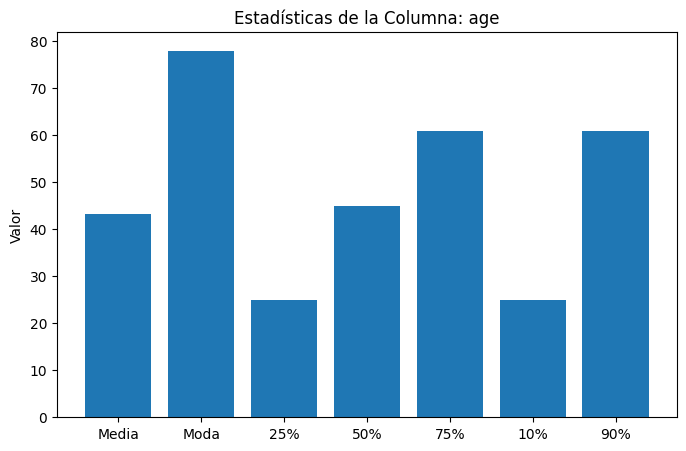

Columna: hypertension
Media: 0.0974559686888454
Moda: 0.0
Cuartiles: [0.0, 0.0, 0.0]
Percentiles: [0.0, 0.0]



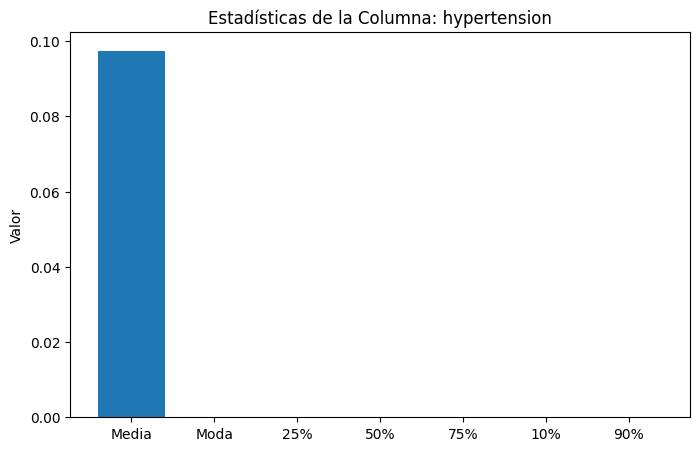

Columna: heart_disease
Media: 0.05401174168297456
Moda: 0.0
Cuartiles: [0.0, 0.0, 0.0]
Percentiles: [0.0, 0.0]



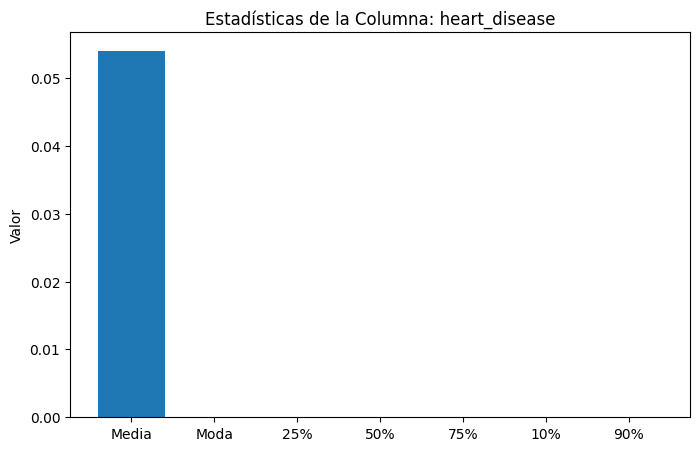

In [5]:
# Calcular la media, moda, cuartiles y percentiles para cada columna seleccionada y generar gráficas
for columna, valores_columna in datos_por_columna.items():
    valores_numericos = [float(valor) for valor in valores_columna if valor.strip().replace(".", "").isdigit()]  # Convierte a números
    
    if len(valores_numericos) > 0:
        # Cálculo de la media
        media = sum(valores_numericos) / len(valores_numericos)
        
        # Cálculo de la moda
        moda = Counter(valores_numericos).most_common(1)[0][0]
        
        # Cálculo de cuartiles (25%, 50%, 75%)
        valores_ordenados = sorted(valores_numericos)
        cuartiles = [valores_ordenados[int(len(valores_ordenados) * q)] for q in [0.25, 0.5, 0.75]]
        
        # Cálculo de percentiles (por ejemplo, 10%, 90%)
        percentiles = [valores_ordenados[int(len(valores_ordenados) * p)] for p in [0.25, 0.75]]
        # Imprimir resultados
        print(f"Columna: {columna}")
        print(f"Media: {media}")
        print(f"Moda: {moda}")
        print(f"Cuartiles: {cuartiles}")
        print(f"Percentiles: {percentiles}")
        print()
        
        valores.append([media, moda] + cuartiles + percentiles)
        
        # Gráfica de barras
        plt.figure(figsize=(8, 5))
        plt.bar(etiquetas, valores[-1])
        plt.title(f'Estadísticas de la Columna: {columna}')
        plt.ylabel('Valor')
        plt.show()